In [4]:
# --- CELLULE 1 : CONFIGURATION ---
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ajoute le dossier racine au chemin pour pouvoir importer 'src'
# ".." signifie "remonter d'un dossier"
sys.path.append(os.path.abspath('..'))

# Importation de ton module
from src.data_loader import DataLoader

# Configuration du style des graphiques
%matplotlib inline
sns.set_theme(style="whitegrid") # Un style propre pour les rapports
plt.rcParams['figure.figsize'] = (12, 6) # Taille par défaut des images

In [5]:
# --- CELLULE 2 : CHARGEMENT ---

# 1. Définition des paramètres
TICKERS = ['AAPL', 'JPM', 'XOM', 'TLT']
START_DATE = "2020-01-01"
END_DATE = "2025-12-31"

# 2. Instanciation du loader
loader = DataLoader(TICKERS, START_DATE, END_DATE)

# 3. Récupération des données
data = loader.get_data()

# 4. Affichage des 5 premières lignes
print("\n--- Aperçu des données brutes (Prix de clôture) ---")
display(data.head())

Chargement des données pour ['AAPL', 'JPM', 'XOM', 'TLT']...


[*********************100%***********************]  4 of 4 completed


--- Aperçu des données brutes (Prix de clôture) ---


Ticker,AAPL,JPM,TLT,XOM
Date,,,,
2020-01-02,72.468254,119.036400,115.443710,53.661709
2020-01-03,71.763718,117.465584,117.221581,53.230309
2020-01-06,72.335571,117.372185,116.555931,53.639011
2020-01-07,71.995354,115.376762,115.982979,53.200035
2020-01-08,73.153496,116.276833,115.216194,52.397747


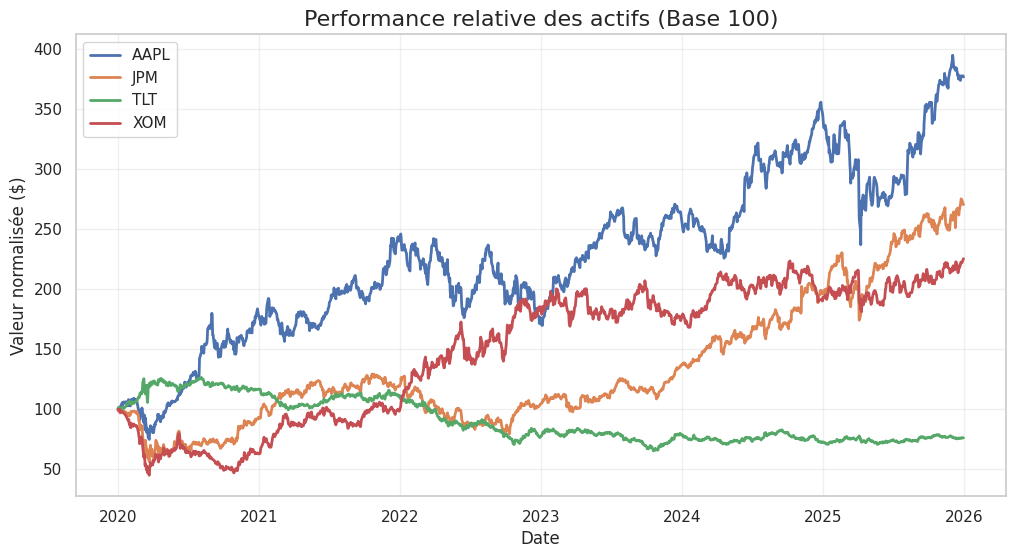

In [6]:
# --- CELLULE 3 : GRAPHIQUE PRIX NORMALISÉS ---

# Normalisation : (Prix / Prix_Initial) * 100
# Cela permet de voir "Si j'avais investi 100$ dans chaque actif au début, combien j'aurais ?"
data_normalized = (data / data.iloc[0]) * 100

plt.figure(figsize=(12, 6))
for column in data_normalized.columns:
    plt.plot(data_normalized.index, data_normalized[column], label=column, linewidth=2)

plt.title("Performance relative des actifs (Base 100)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Valeur normalisée ($)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

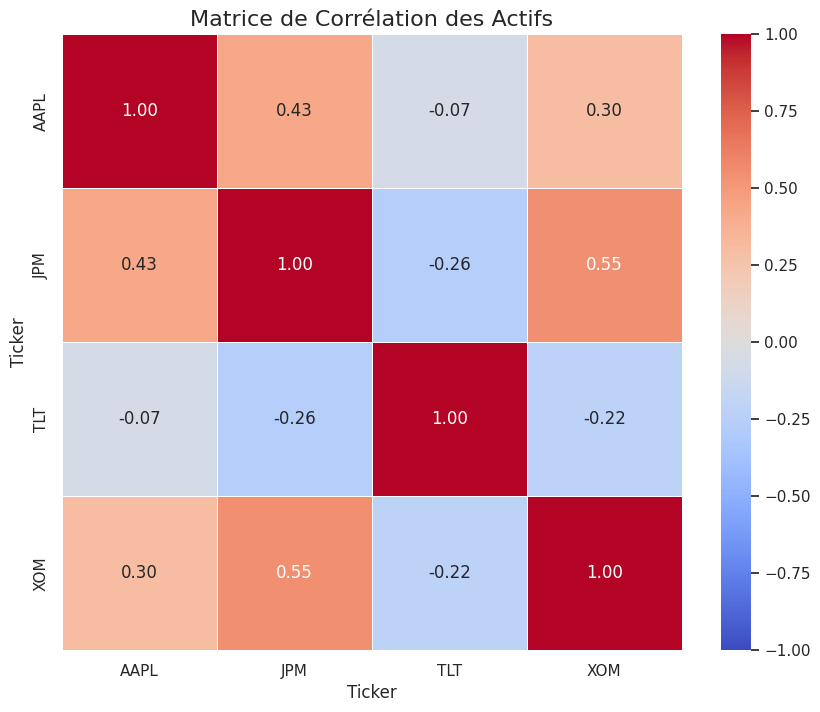


--- Interprétation ---
1. Rouge foncé (proche de 1) : Les actifs bougent ensemble (Risque concentré).
2. Bleu (proche de 0 ou négatif) : Les actifs sont décorrélés (Bonne diversification).
Regarde la case entre 'TLT' (Obligations) et 'AAPL' (Actions). Si elle est basse, ton portefeuille est bien diversifié.


In [7]:
# --- CELLULE 4 : MATRICE DE CORRÉLATION ---

# On a besoin des rendements pour calculer la corrélation, pas des prix !
returns = loader.calculate_returns(data)

# Calcul de la matrice de corrélation
corr_matrix = returns.corr()

# Visualisation avec une Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,           # Affiche les chiffres
            cmap='coolwarm',      # Bleu (froid/négatif) à Rouge (chaud/positif)
            vmin=-1, vmax=1,      # Bornes de -1 à 1
            linewidths=0.5, 
            fmt=".2f")            # 2 chiffres après la virgule

plt.title("Matrice de Corrélation des Actifs", fontsize=16)
plt.show()

# Petite interprétation automatique pour t'aider
print("\n--- Interprétation ---")
print("1. Rouge foncé (proche de 1) : Les actifs bougent ensemble (Risque concentré).")
print("2. Bleu (proche de 0 ou négatif) : Les actifs sont décorrélés (Bonne diversification).")
print(f"Regarde la case entre 'TLT' (Obligations) et 'AAPL' (Actions). Si elle est basse, ton portefeuille est bien diversifié.")